In [2]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [12]:
Data_Dir_HR = 'HR_Data'
Data_Dir_Nginx = 'Replicas_vs_RPS'
Data_Dir = Data_Dir_Nginx
#traffic = 'TC-VM-01'
Perfomance_File = os.path.join(Data_Dir, 'nginx_metrics.csv')


if os.path.exists(Perfomance_File):
    df_baselines = pd.read_csv(Perfomance_File)
    print("Loaded performance metrics:")
    display(df_baselines)
    print(df_baselines.shape)
else:
    print(f"Performance file not found at {Perfomance_File}. Please verify path.")
    df_baselines = pd.DataFrame()

Loaded performance metrics:


,Test_ID,Replicas,Interference_Name,Interference_ID,Given_RPS,Throughput,Avg_Latency,P50_Latency,P75_Latency,P90_Latency,P95_Latency,P99_Latency,Max_Latency,Errors
0,1replicas_scenario0_100rps,1,Baseline0,0,100,100.005546,0.306,0.315,0.0,0.492,0.547,0.602,1.431,0
1,1replicas_scenario0_500rps,1,Baseline0,0,500,500.005697,0.088,0.085,0.0,0.102,0.111,0.159,1.748,0
2,1replicas_scenario0_1000rps,1,Baseline0,0,1000,1000.002485,0.087,0.084,0.0,0.100,0.107,0.141,3.408,0
3,1replicas_scenario0_2000rps,1,Baseline0,0,2000,2000.002668,0.087,0.084,0.0,0.108,0.117,0.149,3.755,0
4,1replicas_scenario0_3000rps,1,Baseline0,0,3000,3000.006338,0.093,0.087,0.0,0.119,0.134,0.175,3.346,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,5replicas_scenario0_8000rps,5,Baseline0,0,8000,7999.955651,0.123,0.109,0.0,0.175,0.207,0.510,3.939,0
66,5replicas_scenario0_9000rps,5,Baseline0,0,9000,8999.957510,0.143,0.124,0.0,0.202,0.241,0.705,7.835,0
67,5replicas_scenario0_10000rps,5,Baseline0,0,10000,9999.942441,0.157,0.131,0.0,0.229,0.275,0.928,4.122,0
68,5replicas_scenario0_12000rps,5,Baseline0,0,12000,12000.042474,0.191,0.124,0.0,0.302,0.386,1.449,59.290,0


(70, 14)


In [20]:
def plot_baseline_heatmap(df_baselines, metric="P99_Latency"):
    # Extract numeric RPS and Replicas from strings
    df = df_baselines.copy()
    df["RPS"] = df["Given_RPS"].astype(int)
    df["Replicas"] = df["Replicas"].astype(int)
    # Drop rows with Given_RPS = 15000 or 10000 or 12000
    df = df[(df["Given_RPS"] != 15000) & (df["Given_RPS"] != 10000) & (df["Given_RPS"] != 12000)]

    # Pivot the table to form a 2D matrix: rows=Replicas, columns=RPS
    heatmap_data = df.pivot_table(index="Replicas", columns="RPS", values=metric)

    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="viridis")
    plt.title(f"Heatmap of {metric} by Replicas and RPS / Baseline Scenario")
    plt.xlabel("Requests Per Second (RPS)")
    plt.ylabel("Number of Replicas")
    plt.tight_layout()
    plt.show()


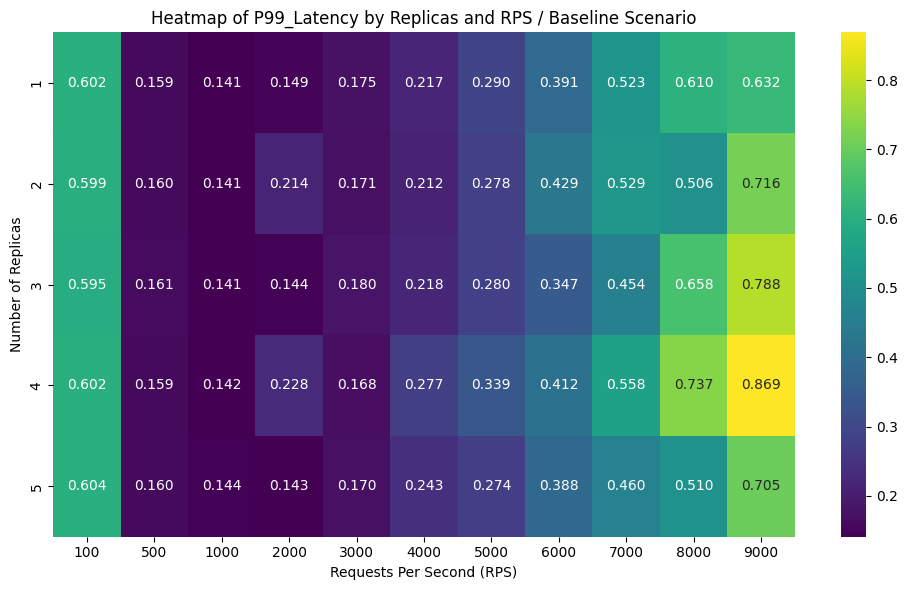

In [21]:
plot_baseline_heatmap(df_baselines, metric="P99_Latency")

## LookUp Table
###For every traffic load (rps) find the optimal number of replicas in 1 server under baseline conditions.

In [4]:
LookUp_Table_Data_Dir = 'LookUpTable_V01' 
#traffic = 'TC-VM-01'
Perfomance_File = os.path.join(LookUp_Table_Data_Dir, 'nginx_metrics.csv')


if os.path.exists(Perfomance_File):
    df_lookup_table = pd.read_csv(Perfomance_File)
    print("Loaded performance metrics:")
    display(df_lookup_table)
    print(df_lookup_table.shape)
else:
    print(f"Performance file not found at {Perfomance_File}. Please verify path.")
    df_lookup_table = pd.DataFrame()

Loaded performance metrics:


,Test_ID,Replicas,Interference_Name,Interference_ID,Given_RPS,Throughput,Avg_Latency,P50_Latency,P75_Latency,P90_Latency,P95_Latency,P99_Latency,Max_Latency,Errors
0,1replicas_scenario0_100rps,1,Baseline0,0,100,100.004888,0.303,0.311,0.0,0.508,0.555,0.613,1.806,0
1,1replicas_scenario1_100rps,1,Baseline1,1,100,100.005420,0.300,0.306,0.0,0.505,0.553,0.605,2.321,0
2,1replicas_scenario0_500rps,1,Baseline0,0,500,500.003600,0.087,0.083,0.0,0.101,0.109,0.155,3.453,0
3,1replicas_scenario1_500rps,1,Baseline1,1,500,500.005674,0.088,0.084,0.0,0.101,0.110,0.159,2.950,0
4,1replicas_scenario0_1000rps,1,Baseline0,0,1000,1000.000694,0.087,0.083,0.0,0.101,0.110,0.170,3.573,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,4replicas_scenario1_6000rps,4,Baseline1,1,6000,5999.993940,0.107,0.092,0.0,0.150,0.176,0.392,5.692,0
116,4replicas_scenario0_6500rps,4,Baseline0,0,6500,6500.005369,0.109,0.096,0.0,0.152,0.180,0.391,2.979,0
117,4replicas_scenario1_6500rps,4,Baseline1,1,6500,6499.964278,0.107,0.095,0.0,0.149,0.174,0.376,3.513,0
118,4replicas_scenario0_7000rps,4,Baseline0,0,7000,6999.966694,0.116,0.100,0.0,0.164,0.194,0.463,4.915,0


(120, 14)


In [5]:
import pandas as pd

# Group by RPS and Replicas, take the mean P99_Latency and Errors across the two baselines
grouped = (
    df_lookup_table.groupby(["Given_RPS", "Replicas"])
    .agg({
        "P99_Latency": "mean",
        "Errors": "mean"
    })
    .reset_index()
)

# For each RPS, select the replica count with minimal P99_Latency and zero errors
lookup_entries = []
for rps in sorted(grouped["Given_RPS"].unique()):
    subset = grouped[grouped["Given_RPS"] == rps]
    valid = subset[subset["Errors"] == 0]
    if not valid.empty:
        best = valid.loc[valid["P99_Latency"].idxmin()]
        lookup_entries.append((rps, int(best["Replicas"])))

# Final lookup table
lookup_table = pd.DataFrame(lookup_entries, columns=["RPS", "Recommended_Replicas"])
print(lookup_table)


     RPS  Recommended_Replicas
0    100                     2
1    500                     1
2   1000                     2
3   1500                     2
4   2000                     3
5   2500                     2
6   3000                     2
7   3500                     2
8   4000                     4
9   4500                     2
10  5000                     2
11  5500                     2
12  6000                     2
13  6500                     4
14  7000                     4


In [6]:
lookup_table.to_csv("replica_lookup.csv", index=False)


In [ ]:
lookup_table.to_json("replica_lookup.json", orient="records", indent=2)
